In [2]:
import yaml
from train_model import *

In [3]:
config_dir = '/home/shiqi/code/Project2-sensor-case/model_combination_Argos/combined_model_20240805/outputs/experiment_1/config.yaml'
config = read_config_file(config_dir)

In [4]:
import numpy as np
import torch

# Define the save directory
save_dir = config['save_dir']

# Load linear model results
linear_mean_relative_errors_train = np.load(save_dir + '/linear_mean_relative_errors_train.npy')
linear_mean_relative_errors_test = np.load(save_dir + '/linear_mean_relative_errors_test.npy')
linear_mean_relative_diffs_train = np.load(save_dir + '/linear_mean_relative_diffs_train.npy')
linear_mean_relative_diffs_test = np.load(save_dir + '/linear_mean_relative_diffs_test.npy')

# Load residual model results
residual_mean_relative_errors_train = np.load(save_dir + '/residual_mean_relative_errors_train.npy')
residual_mean_relative_errors_test = np.load(save_dir + '/residual_mean_relative_errors_test.npy')
residual_mean_relative_diffs_train = np.load(save_dir + '/residual_mean_relative_diffs_train.npy')
residual_mean_relative_diffs_test = np.load(save_dir + '/residual_mean_relative_diffs_test.npy')

# Load hybrid model results
hybrid_mean_relative_errors_train = np.load(save_dir + '/hybrid_mean_relative_errors_train.npy')
hybrid_mean_relative_errors_test = np.load(save_dir + '/hybrid_mean_relative_errors_test.npy')
hybrid_mean_relative_diffs_train = np.load(save_dir + '/hybrid_mean_relative_diffs_train.npy')
hybrid_mean_relative_diffs_test = np.load(save_dir + '/hybrid_mean_relative_diffs_test.npy')
iterative_losses = np.load(config['save_dir'] + '/iterative_losses.npy')


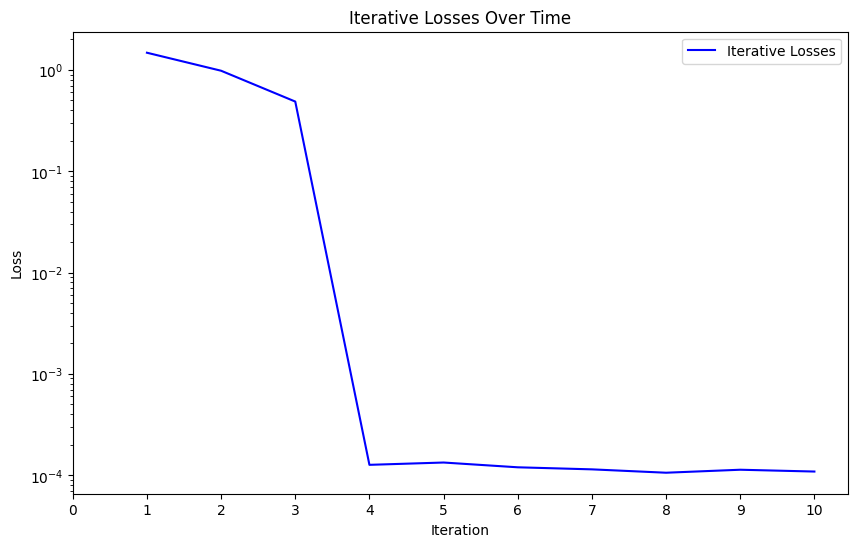

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Plot the iterative losses
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(iterative_losses) + 1), iterative_losses, label='Iterative Losses', color='blue')
plt.xticks(range(len(iterative_losses) + 1))
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.yscale('log')
plt.title('Iterative Losses Over Time')
plt.legend()
plt.show()

In [38]:
custom_palette = [
    (0/255, 0/255, 0/255),         # 黑色 (0, 0, 0)
    (128/255, 128/255, 128/255),   # 灰色 (128, 128, 128)
    # (158/255, 129/255, 186/255),   # 紫灰色 (158, 129, 186)
    # (216/255, 205/255, 227/255),   # 浅紫色 (216, 205, 227)
    (76/255, 57/255, 107/255),     # 深紫色 (76, 57, 107)
    (183/255, 176/255, 196/255),   # 灰蓝色 (183, 176, 196)
    (115/255, 62/255, 115/255),    # 紫红色 (115, 62, 115)
    (199/255, 178/255, 199/255)    # 灰紫色 (199, 178, 199)
]


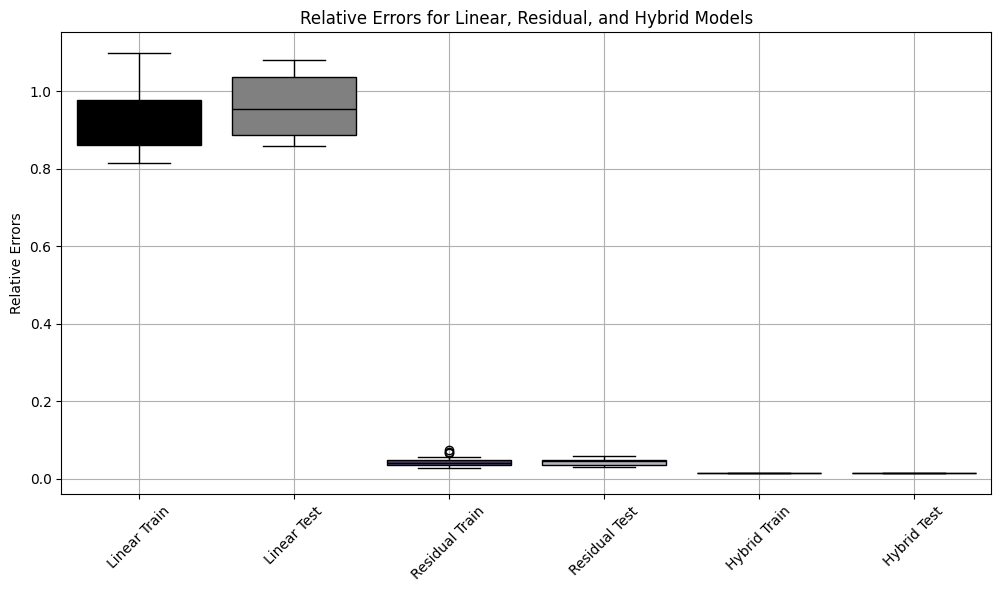

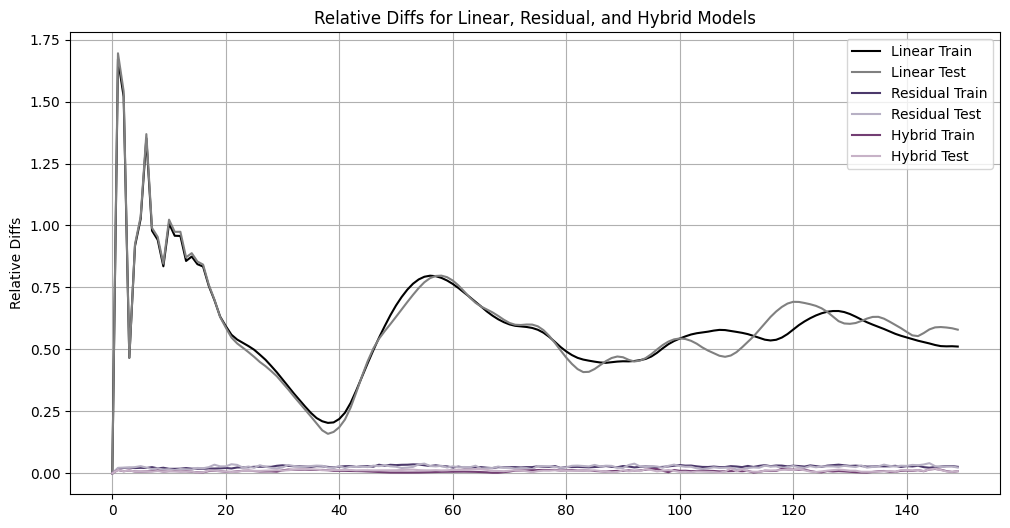

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare data for plotting
relative_errors = [
    linear_mean_relative_errors_train, linear_mean_relative_errors_test,
    residual_mean_relative_errors_train, residual_mean_relative_errors_test,
    hybrid_mean_relative_errors_train, hybrid_mean_relative_errors_test
]

relative_diffs = [
    linear_mean_relative_diffs_train, linear_mean_relative_diffs_test,
    residual_mean_relative_diffs_train, residual_mean_relative_diffs_test,
    hybrid_mean_relative_diffs_train, hybrid_mean_relative_diffs_test
]

# Labels for the boxplots
labels_errors = [
    'Linear Train', 'Linear Test', 
    'Residual Train', 'Residual Test', 
    'Hybrid Train', 'Hybrid Test'
]

labels_diffs = [
    'Linear Train', 'Linear Test', 
    'Residual Train', 'Residual Test', 
    'Hybrid Train', 'Hybrid Test'
]

# Plotting relative errors boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=relative_errors, palette=custom_palette)
plt.xticks(ticks=range(len(labels_errors)), labels=labels_errors, rotation=45)
plt.ylabel('Relative Errors')
plt.title('Relative Errors for Linear, Residual, and Hybrid Models')
plt.grid(True)
plt.show()

# Plotting relative diffs boxplot
plt.figure(figsize=(12, 6))
for i in range(len(relative_diffs)):
    plt.plot(relative_diffs[i], label=labels_diffs[i], color = custom_palette[i])
plt.ylabel('Relative Diffs')
plt.legend(loc='upper right')
plt.title('Relative Diffs for Linear, Residual, and Hybrid Models')
plt.grid(True)
plt.show()

In [44]:
linear_mean_relative_errors_train

array([0.99236551, 0.95293678, 0.90930402, 0.83380084, 0.83854184,
       0.94349023, 0.9957067 , 0.85442713, 1.0780472 , 0.93842301,
       1.09050699, 1.02737133, 0.92616643, 0.87334203, 1.07016583,
       0.94177265, 0.84504363, 0.95169588, 0.93953401, 0.8795108 ,
       0.81397119, 0.85634888, 0.90833955, 0.95752659, 0.86664027,
       1.02948707, 0.93325648, 0.83376467, 0.96131405, 1.05539058,
       0.86261267, 0.85513934, 0.93008303, 0.93231415, 0.98178904,
       0.87320355, 0.85937536, 1.02242695, 1.09821915, 0.93038303,
       0.82270968, 0.81426467])

/tmp/ipykernel_3926053/3643673166.py:33: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.boxplot(data=relative_errors, palette=custom_palette[2:])


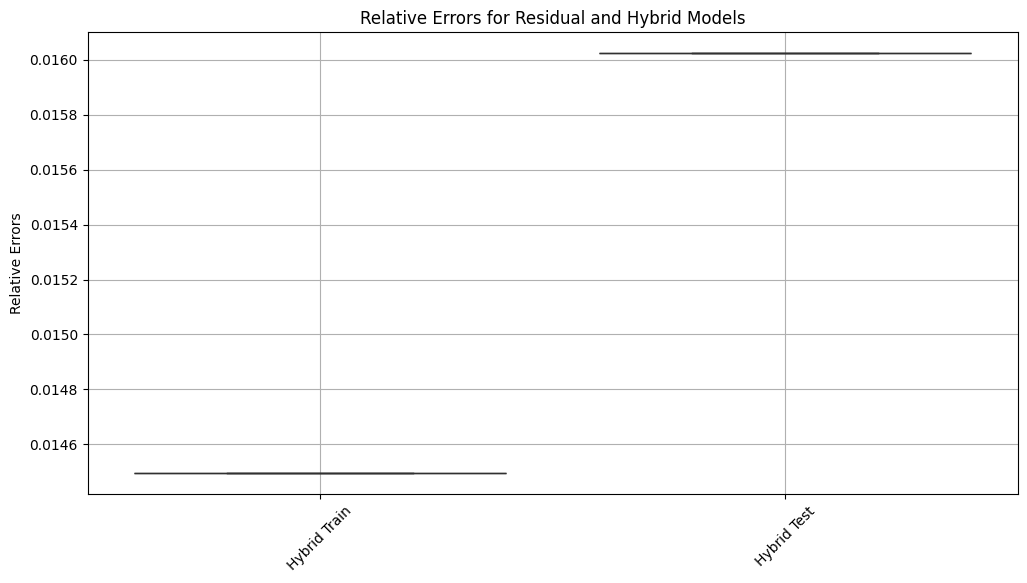

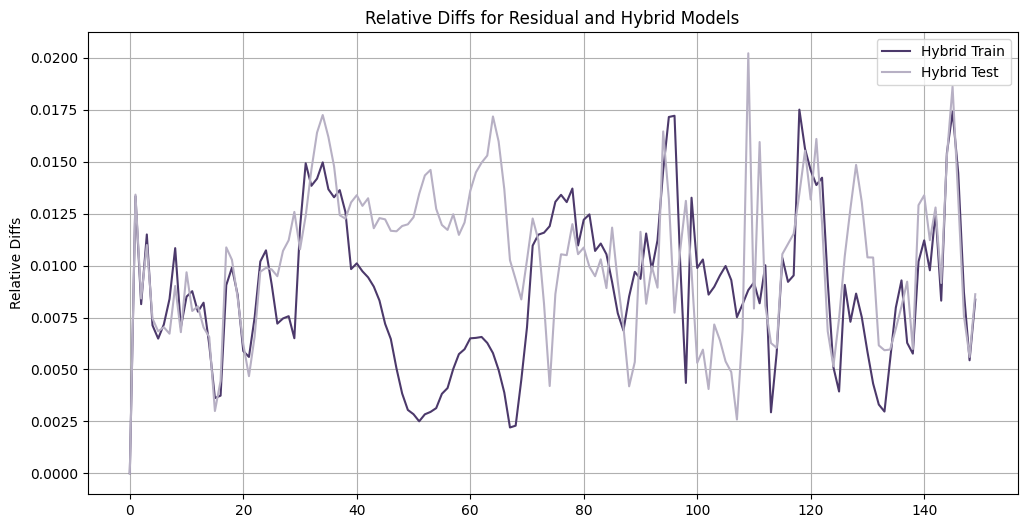

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare data for plotting
relative_errors = [
    # linear_mean_relative_errors_train, linear_mean_relative_errors_test,
    residual_mean_relative_errors_train, residual_mean_relative_errors_test,
    hybrid_mean_relative_errors_train, hybrid_mean_relative_errors_test
]

relative_diffs = [
    # linear_mean_relative_diffs_train, linear_mean_relative_diffs_test,
    residual_mean_relative_diffs_train, residual_mean_relative_diffs_test,
    hybrid_mean_relative_diffs_train, hybrid_mean_relative_diffs_test
]

# Labels for the boxplots
labels_errors = [
    # 'Linear Train', 'Linear Test', 
    'Residual Train', 'Residual Test', 
    'Hybrid Train', 'Hybrid Test'
]

labels_diffs = [
    # 'Linear Train', 'Linear Test', 
    'Residual Train', 'Residual Test', 
    'Hybrid Train', 'Hybrid Test'
]

# Plotting relative errors boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=relative_errors, palette=custom_palette[2:])
plt.xticks(ticks=range(len(labels_errors)), labels=labels_errors, rotation=45)
plt.ylabel('Relative Errors')
plt.title('Relative Errors for Residual and Hybrid Models')
plt.grid(True)
plt.show()

# Plotting relative diffs boxplot
plt.figure(figsize=(12, 6))
for i in range(len(relative_diffs)):
    plt.plot(relative_diffs[i], label=labels_diffs[i], color = custom_palette[2+i])
plt.ylabel('Relative Diffs')
plt.legend(loc='upper right')
plt.title('Relative Diffs for Residual and Hybrid Models')
plt.grid(True)
plt.show()

In [46]:
# device = 'cpu'

# ## Load data
# x_data, y_data, u_data = data_preparation(config, config['train_data_dir'])
# x_data = torch.tensor(x_data, dtype=torch.float32).to(device)
# y_data = torch.tensor(y_data, dtype=torch.float32).to(device)
# u_data = torch.tensor(u_data, dtype=torch.float32).to(device)
# dataset = [x_data, y_data, u_data]

# ## Dimension
# x_dim = x_data.shape[-1]
# u_dim = u_data.shape[-1]


# ## PCA
# # Standardize data
# mean_1 = torch.mean(x_data, dim=0)
# std_1 = torch.std(x_data, dim=0)
# std_layer_1 = StdScalerLayer(mean_1, std_1)
# x_data_scaled = std_layer_1.transform(x_data)

# # PCA layer
# pca = PCA(n_components=config['pca_dim'])
# # Ensure x_data_scaled is converted back to a NumPy array for PCA
# pca.fit(x_data_scaled.detach().cpu().numpy())
# components = pca.components_
# pca_matrix = torch.tensor(components, dtype=torch.float32).to(device)
# print(f'PCA matrix shape: {pca_matrix.shape}')
# pca_layer = PCALayer(x_dim, config['pca_dim'], pca_matrix)

# # Standardize data 2
# x_pca = pca_layer.transform(x_data_scaled)
# mean_2 = torch.mean(x_pca, dim=0)
# std_2 = torch.std(x_pca, dim=0)
# std_layer_2 = StdScalerLayer(mean_2, std_2)

# # Build pca dataset
# x_pca_scaled = std_layer_2.transform(x_pca)
# y_data_scaled = std_layer_1.transform(y_data)
# y_pca = pca_layer.transform(y_data_scaled)
# y_pca_scaled = std_layer_2.transform(y_pca)
# mean_u = torch.mean(u_data, dim=0)
# std_u = torch.std(u_data, dim=0)
# std_layer_u = StdScalerLayer(mean_u, std_u)
# u_data_scaled = std_layer_u.transform(u_data)
# dataset = [x_pca_scaled, y_pca_scaled, u_data_scaled]
# print(f'PCA data shape: {x_pca_scaled.shape}, {y_pca_scaled.shape}, {u_data_scaled.shape}')

# ## Models
# # Linear model
# linear_model = Linear_model(config['pca_dim']+1, u_dim)

In [35]:
# params = Params(x_dim, u_dim, config)
# state_dict = State_Encoder(params)
# control_dict = Control_Encoder(params)
# residual_model = PCAKoopman(params, std_layer_1, pca_layer, std_layer_2, std_layer_u, state_dict, control_dict)


In [36]:
# # Evaluation data
# x_dataset_train, u_dataset_train = load_evaluation_data(config['begin'], config['end'], config['train_data_dir'])
# x_dataset_test, u_dataset_test = load_evaluation_data(config['begin'], config['end'], config['test_data_dir'])


In [27]:
# import copy

# linear_model.load_state_dict(torch.load(config['save_dir'] + '/hybrid_linear_model.pth'))
# residual_model.load_state_dict(torch.load(config['save_dir'] + '/hybrid_residual_model.pth'))
# std_layer_err = copy.deepcopy(std_layer_2)
# std_layer_err.load_state_dict(torch.load(config['save_dir'] + '/hybrid_std_layer_err.pth'))

In [28]:
# x_dataset = x_dataset_train
# u_dataset = u_dataset_train
# pca_transformer = pca_layer

# for x_data, u_data in zip(x_dataset, u_dataset):
#     x_data = torch.tensor(x_data, dtype=torch.float32).to(device)
#     u_data = torch.tensor(u_data, dtype=torch.float32).to(device)
#     # print(x_data.shape, u_data.shape)
#     x_pred = torch.zeros_like(x_data).to(device)
#     x_pred[0, :] = x_data[0, :]

#     x0 = encode_state(x_data[0:1, :], std_layer_1, pca_transformer, std_layer_2)
#     print(x0.shape)

#     for step in range(1, 10):
#         u = std_layer_u.transform(u_data[step - 1, :].reshape(1, -1))
#         x1 = linear_model(x0, u) + residual_model.latent_to_latent_forward(x0, u, std_layer_err)
#         x_pred[step, :] = decode_state(x1, std_layer_1, pca_transformer, std_layer_2)
#         x0 = x1
    
#     break

# print(x_pred)
# x_pca_pred = encode_state(x_pred.detach(), std_layer_1, pca_transformer, std_layer_2)


In [29]:
# from train_model import generate_hybrid_trajectories
# x_data_pred_traj_train, x_data_pca_traj_train, x_data_pca_pred_traj_train = generate_hybrid_trajectories(x_dataset_train, u_dataset_train, linear_model, residual_model, std_layer_1, pca_layer, std_layer_2, std_layer_u, std_layer_err, device)


In [15]:
# print(x_data_pca_pred_traj_train)